In [1]:
from PIL import Image, ImageDraw
import random
import string
import numpy as np

In [28]:
def one_hot(x, length):
    return [1 if x==i else 0 for i in range(length)]

def get_word(c):
    words = ["One", "Two", "none"]
    return (words[c], one_hot(c,len(words)))

In [3]:
cell_w = 32
cell_h = 32
grid_w = 2
grid_h = 2

In [130]:
one = Image.open('C:\\Users\\Asus\\Pictures\\unnamed1.jpg')#unnamed1
two = Image.open('C:\\Users\\Asus\\Pictures\\two.jpg')
one.size[0]

25

In [75]:
img = Image.new('RGB', (grid_w*cell_w,grid_h*cell_h))
#x = random.randrange(0, (1)*cell_w)
#y = random.randrange(0, min(67, (1)*cell_h))
x,y=test.size
img.paste(test, (7, 2))


img.show()

In [131]:

for j in range(0,5000):
    img = Image.new('RGB', (grid_w*cell_w,grid_h*cell_h))
    d = ImageDraw.Draw(img)
    
    with open('C:\\Users\\Asus\\L\Labels%d.txt' % j,'w+') as f:
     
        for row in range(grid_w):
            for col in range(grid_h):

                (digits, cat) = get_word(random.randint(0,2))
                
                width1 = one.size[0]
                width2 = two.size[0]
                
                if(digits=='none'):
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]) )        
                    f.write('%d %d %d %d\n' % ( col*cell_w+cell_w/2, row*cell_h+cell_h/2, cell_w, cell_h ))
                    f.write('0\n') # confidence of object
                    print("None", (col,row), (col*cell_w+cell_w/2, row*cell_h+cell_h/2, cell_w, cell_h), 0)
                elif(digits=='One'):
                    x = random.randrange(col*cell_w, (col+1)*cell_w)
                    y = random.randrange(row*cell_w, min(67, (row+1)*cell_h))
                    
                    img.paste(one, (x, y))
                    
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]))
                    f.write('%d %d %d %d\n' % (x, y, width1, width1) )
                    f.write('1\n') # confidence of object
                    print("One", (col,row), (x, y, width1, width1), 1)
                    
                else:
                    x = random.randrange(col*cell_w, (col+1)*cell_w)
                    y = random.randrange(row*cell_w, min(67, (row+1)*cell_h))
                    
                    
                    img.paste(two, (x, y))
                    
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]))
                    f.write('%d %d %d %d\n' % (x, y, width2, width2) )
                    f.write('1\n') # confidence of object
                    print("Two", (col,row), (x, y, width2, width2), 1)
        
        f.write('---\n')

    img.save('C:\\Users\\Asus\\I\Images%d.PNG' % j)

Two (0, 0) (23, 22, 25, 25) 1
Two (1, 0) (57, 13, 25, 25) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
One (0, 0) (15, 16, 25, 25) 1
One (1, 0) (43, 27, 25, 25) 1
Two (0, 1) (1, 42, 25, 25) 1
One (1, 1) (57, 32, 25, 25) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
One (0, 1) (6, 61, 25, 25) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
One (0, 0) (0, 11, 25, 25) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
One (0, 1) (7, 45, 25, 25) 1
One (1, 1) (42, 40, 25, 25) 1
One (0, 0) (27, 20, 25, 25) 1
Two (1, 0) (47, 31, 25, 25) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Two (1, 1) (35, 62, 25, 25) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Two (1, 0) (46, 21, 25, 25) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Two (1, 1) (35, 62, 25, 25) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Two (1, 1) (42, 46, 25, 25) 1
Two (0, 0) (31, 5, 25, 25) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None 

In [151]:
from __future__ import print_function
import tensorflow as tf
import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Reshape
from keras.layers import Conv2D, MaxPooling2D


In [152]:
from keras.layers.advanced_activations import LeakyReLU, PReLU

from keras import backend as K
from keras.models import load_model
import numpy as np
import sys
import cv2

In [153]:
import argparse

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [154]:
x_train = []
y_train = []

nb_boxes=1
grid_w=2
grid_h=2
cell_w=32
cell_h=32
img_w=grid_w*cell_w
img_h=grid_h*cell_h

#
# Read input image and output prediction
#
def load_image(j):
    img = cv2.imread('C:\\Users\\Asus\\I\Images%d.PNG' % j)
#    img = cv2.resize(img,(64,64))
    
    x_t = img_to_array(img)

    with open('C:\\Users\\Asus\\L\Labels%d.txt' % j, "r") as f:
        y_t = []
        for row in range(grid_w):
            for col in range(grid_h):
                c_t = [float(i) for i in f.readline().split()]
                [x, y, w, h] = [float(i) for i in f.readline().split()]        
                conf_t = [float(i) for i in f.readline().split()]                
                elt = []
                elt += c_t
                for b in range(nb_boxes):
                    elt += [x/cell_w, y/cell_h, w/img_w, h/img_h] + conf_t
                y_t.append(elt)
        assert(f.readline()=="---\n")
        
    return [x_t, y_t]

#
# Load all images and append to vector
# 
#for j in range(0, 10):
for j in range(10, 5000):
    [x,y] = load_image(j)
    x_train.append(x)
    y_train.append(y)

x_train = np.array(x_train)
y_train = np.array(y_train)


In [155]:
i = Input(shape=(img_h,img_w,3))

x = Conv2D(16, (1, 1))(i)
x = Conv2D(32, (3, 3))(x)
x = keras.layers.LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, (3, 3))(x)
x = Conv2D(32, (3, 3))(x)
x = keras.layers.LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
#x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dense(grid_w*grid_h*(3+nb_boxes*5), activation='sigmoid')(x)
x = Reshape((grid_w*grid_h,(3+nb_boxes*5)))(x)

model = Model(i, x)


In [156]:
def custom_loss(y_true, y_pred):
    # define a grid of offsets
    # [[[ 0.  0.]]
    # [[ 1.  0.]]
    # [[ 0.  1.]]
    # [[ 1.  1.]]]
    grid = np.array([ [[float(x),float(y)]]*nb_boxes   for y in range(grid_h) for x in range(grid_w)])

    # first three values are classes : cat, rat, and none.
    # However yolo doesn't predict none as a class, none is everything else and is just not predicted
    # so I don't use it in the loss
    y_true_class = y_true[...,0:2]
    y_pred_class = y_pred[...,0:2] 

    # reshape array as a list of grid / grid cells / boxes / of 5 elements
    pred_boxes = K.reshape(y_pred[...,3:], (-1,grid_w*grid_h,nb_boxes,5))
    true_boxes = K.reshape(y_true[...,3:], (-1,grid_w*grid_h,nb_boxes,5))
    
    # sum coordinates of center of boxes with cell offsets.
    # as pred boxes are limited to 0 to 1 range, pred x,y + offset is limited to predicting elements inside a cell
    y_pred_xy   = pred_boxes[...,0:2] + K.variable(grid)
    # w and h predicted are 0 to 1 with 1 being image size
    y_pred_wh   = pred_boxes[...,2:4]
    # probability that there is something to predict here
    y_pred_conf = pred_boxes[...,4]

    # same as predicate except that we don't need to add an offset, coordinate are already between 0 and cell count
    y_true_xy   = true_boxes[...,0:2]
    # with and height
    y_true_wh   = true_boxes[...,2:4]
    # probability that there is something in that cell. 0 or 1 here as it's a certitude.
    y_true_conf = true_boxes[...,4]

    clss_loss  = K.sum(K.square(y_true_class - y_pred_class), axis=-1)
    xy_loss    = K.sum(K.sum(K.square(y_true_xy - y_pred_xy),axis=-1)*y_true_conf, axis=-1)
    wh_loss    = K.sum(K.sum(K.square(K.sqrt(y_true_wh) - K.sqrt(y_pred_wh)), axis=-1)*y_true_conf, axis=-1)

    # when we add the confidence the box prediction lower in quality but we gain the estimation of the quality of the box
    # however the training is a bit unstable

    # compute the intersection of all boxes at once (the IOU)
    intersect_wh = K.maximum(K.zeros_like(y_pred_wh), (y_pred_wh + y_true_wh)/2 - K.square(y_pred_xy - y_true_xy) )
    intersect_area = intersect_wh[...,0] * intersect_wh[...,1]
    true_area = y_true_wh[...,0] * y_true_wh[...,1]
    pred_area = y_pred_wh[...,0] * y_pred_wh[...,1]
    union_area = pred_area + true_area - intersect_area
    iou = intersect_area / union_area

    conf_loss = K.sum(K.square(y_true_conf*iou - y_pred_conf), axis=-1)

    # final loss function
    d = xy_loss + wh_loss + conf_loss + clss_loss
    
    if False:
        d = tf.Print(d, [d], "loss")
        d = tf.Print(d, [xy_loss], "xy_loss")
        d = tf.Print(d, [wh_loss], "wh_loss")
        d = tf.Print(d, [clss_loss], "clss_loss")
        d = tf.Print(d, [conf_loss], "conf_loss")
    
    return d


In [157]:
model = Model(i, x)

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(loss=custom_loss, optimizer=adam) # better

In [158]:
print(model.summary())

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 16)        64        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 62, 62, 32)        4640      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 29, 29, 16)        4624      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 27, 27, 32)        464

In [159]:
tf.config.run_functions_eagerly(True)

In [160]:
parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('--train', help='train', action='store_true')
parser.add_argument('--epoch', help='epoch', const='int', nargs='?', default=1)
args, unknown = parser.parse_known_args()

model.fit(x_train, y_train, batch_size=64, epochs=20)
#model.save_weights('C:\\Users\\Asus\\W\weights_006.h5')


Epoch 1/20
78/78 [==============================] - 23s 298ms/step - loss: 0.6478
Epoch 2/20
78/78 [==============================] - 24s 302ms/step - loss: 0.4825
Epoch 3/20
78/78 [==============================] - 24s 301ms/step - loss: 0.3956
Epoch 4/20
78/78 [==============================] - 23s 300ms/step - loss: 0.3409
Epoch 5/20
78/78 [==============================] - 24s 307ms/step - loss: 0.3104
Epoch 6/20
78/78 [==============================] - 24s 307ms/step - loss: 0.2843
Epoch 7/20
78/78 [==============================] - 24s 309ms/step - loss: 0.2625
Epoch 8/20
78/78 [==============================] - 25s 314ms/step - loss: 0.2459
Epoch 9/20
78/78 [==============================] - 26s 338ms/step - loss: 0.2312
Epoch 10/20
78/78 [==============================] - 27s 344ms/step - loss: 0.2153
Epoch 11/20
78/78 [==============================] - 22s 286ms/step - loss: 0.2048
Epoch 12/20
78/78 [==============================] - 22s 286ms/step - loss: 0.1970
Epoch 13/20
7

<ipython-input-161-360b71b30891>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(5,5,j+1,)


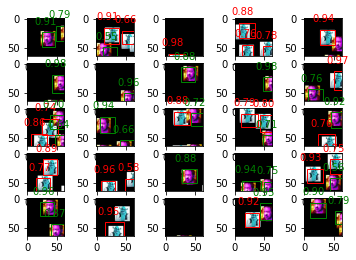

In [161]:
axes=[0 for _ in range(100)]
fig, axes = plt.subplots(5,5)

#
# Predict bounding box and classes for the first 25 images
#
for j in range(0,25):
    im = load_image(j)

    #
    # Predict bounding box and classes
    #
    img = cv2.imread('C:\\Users\\Asus\\I\Images%d.PNG' % j)
    #img = cv2.resize(img, (img_w,img_h))
    #data = img_to_array(img)
    P = model.predict(np.array([ img_to_array(img) ]))
 
    #
    # Draw each boxes and class score over each images using pyplot
    #
    col = 0
    for row in range(grid_w):
        for col in range(grid_h):
            p = P[0][col*grid_h+row]

            boxes = p[3:].reshape(nb_boxes,5)
            clss = np.argmax(p[0:2])
            
            ax = plt.subplot(5,5,j+1,)
            
            imgplot = plt.imshow(img)

            i = 0
            for b in boxes:
                x = b[0]+float(row)
                y = b[1]+float(col)
                w = b[2]
                h = b[3]
                conf = b[4]
                if conf < 0.5:
                    continue

                color = ['r','g','b','0'][clss]
                rect = patches.Rectangle((x*cell_w-w/2*img_w+12.5, y*cell_h-h/2*img_h+12.5), w*img_h, h*img_h, linewidth=1,edgecolor=color,facecolor='none')
                ax.add_patch(rect)

                ax.text( (x*cell_w-w/2*img_w) / img_w, 1-(y*cell_h-h/2*img_h)/img_h-i*0.15, "%0.2f" % (conf), transform=ax.transAxes, color=color)
                i+=1